In [16]:
# All the imports
import matplotlib.pyplot as plt
import numpy as np
import itertools
from tqdm import tqdm
import Hopfield

3.0 Hopfield Network recall

In [17]:
def part3_0():
    x1 = np.array([-1,-1,1,-1,1,-1 ,-1 ,1], dtype=float)
    x2 = np.array([-1,-1,-1,-1,-1,1,-1,-1], dtype=float)
    x3 = np.array([-1,1,1,-1,-1,1,-1,1], dtype=float)
    patterns = np.array([x1,x2,x3])
    network = Hopfield.Hopfield(max_iterations=1)
    network.fit(patterns)
    results = network.predict(patterns)

    for x in range(len(patterns)):
        print("Pattern ", x+1, " is a fixed point: ", np.array_equal(patterns[x], results[x]))
        


part3_0()

Pattern  1  is a fixed point:  True
Pattern  2  is a fixed point:  True
Pattern  3  is a fixed point:  True


### 3.1 Convergence and attractors of Hopfields
- Apply the update rule repeatedly until you reach a stable fixed point. Did all the patterns converge towards stored patterns?

**Answer:** Yes it did converge towards the stored patterns.

In [18]:
# Did all the patterns converge to fixed points? --> Yes
x1d = np.array([1, -1, 1, -1, 1, -1, -1, 1])
x2d = np.array([1, 1, -1, -1, -1, 1, -1, -1])
x3d = np.array([1, 1, 1, -1, 1, 1, -1, 1])
patterns = np.array([x1d,x2d,x3d])

print("Testing with Batch update")

network = Hopfield.Hopfield(max_iterations=100)
network.fit(patterns)
results = network.predict(patterns)
for x in range(len(patterns)):
    # Print if they are fixed points are not
    print("Pattern ", x+1, " is a fixed point: ", np.array_equal(patterns[x], results[x]))

print("Number of fixed points: ", np.sum([np.array_equal(patterns[x], results[x]) for x in range(len(patterns))]))

print("Testing with sequential update")
network = Hopfield.Hopfield(max_iterations=100, prediction_method="sequential")
network.fit(patterns)
results = network.predict(patterns)
for x in range(len(patterns)):
    # Print if they are fixed points are not
    print("Pattern ", x+1, " is a fixed point: ", np.array_equal(patterns[x], results[x]))

Testing with Batch update
Pattern  1  is a fixed point:  True
Pattern  2  is a fixed point:  True
Pattern  3  is a fixed point:  True
Number of fixed points:  3
Testing with sequential update
Pattern  1  is a fixed point:  True
Pattern  2  is a fixed point:  True
Pattern  3  is a fixed point:  True


- How many attractors are there in this network? Hint: automate the searching. 

Number of attractors:  6
occurrences:  [52. 32. 44. 44. 32. 52.]
The attractors are:  [[-1 -1 -1  1 -1 -1  1 -1]
 [-1 -1  1  1  1 -1  1  1]
 [-1  1 -1  1 -1  1  1 -1]
 [ 1 -1  1 -1  1 -1 -1  1]
 [ 1  1 -1 -1 -1  1 -1 -1]
 [ 1  1  1 -1  1  1 -1  1]]


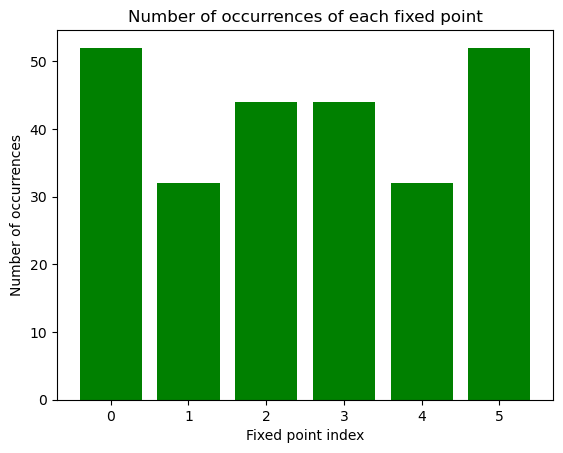

In [19]:
# Creation of the set of all combinations of 3 patterns
all_patterns = np.array([np.array(i) for i in itertools.product([-1, 1], repeat=8)])

# For each combination, find the fixed point
network_mine = Hopfield.Hopfield(max_iterations=3, prediction_method="sequential")
network_mine.fit(patterns)
results = network_mine.predict(all_patterns)

# Finding the attractors
attractors = np.unique(results, axis=0)
occurences = np.zeros(len(attractors))
for i, attractor in enumerate(attractors):
    for j in range(len(results)):
        if np.array_equal(attractor, results[j]):
            occurences[i] += 1

print("Number of attractors: ", len(attractors))
print("occurrences: ", occurences)
print("The attractors are: ", attractors)

# Plotting the attractors
plt.bar(range(len(attractors)), occurences, color="green")
plt.xlabel("Fixed point index")
plt.ylabel("Number of occurrences")
plt.title("Number of occurrences of each fixed point")
plt.show()

- What happens when you make the starting pattern even more dissimilar to the stored ones (e.g more than half is wrong)
**Answer** Cannot converge to the stored patterns.

In [20]:
# These three input patterns have 5 bit errors, compared with x1, x2 and x3
x1d2 = np.array([1, 1, -1, 1, -1, -1, -1, 1])
x2d2 = np.array([1, 1, 1, 1, 1, 1, -1, -1])
x3d2 = np.array([1, -1, -1, 1, 1, 1, -1, 1])
patterns_d2 = np.array([x1d2, x2d2, x3d2])

network = Hopfield.Hopfield()

network.fit(patterns)
results = network.predict(patterns_d2)

for x in range(len(patterns_d2)):
    print("Pattern ", x+1, " is a fixed point: ", np.array_equal(patterns[x], results[x]))
    

Pattern  1  is a fixed point:  False
Pattern  2  is a fixed point:  False
Pattern  3  is a fixed point:  False


## 3.2 Sequential update
Switching to a 1024 neuron network. Load the pict.dat which contains nine 1024 pixel images. Name them p1,p2.... p9. Learn the first three. Since large pattersn are hard to read as row of numbers, please display these 1024-dim pattersn as a 32x32 image.

- Check that the three patterns are stable.


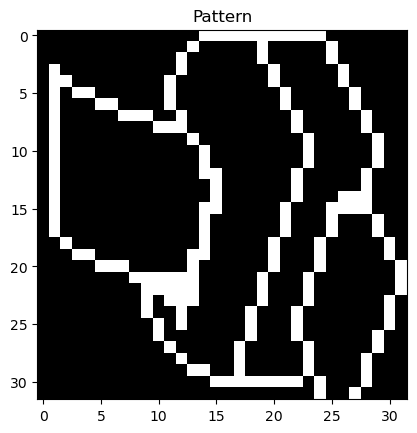

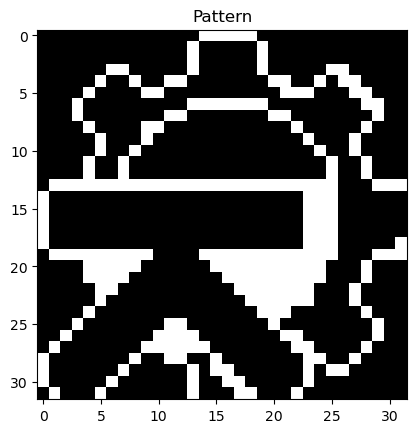

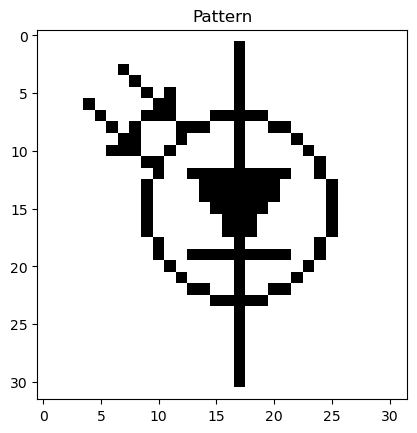

Pattern  1  is a fixed point:  True
Pattern  2  is a fixed point:  True
Pattern  3  is a fixed point:  True


In [21]:
data = np.genfromtxt("../pict.dat", delimiter=",")

# Separates all the data into 11 patterns of size 1024
def separate_data(data):
    patterns = []
    L = []
    for i in range(len(data)):
        if i % 1024 == 0 and i != 0:
            patterns.append(L)
            L = []
        L.append(data[i])
    patterns.append(L)
    return np.array(patterns)


# Displats the patterns
def display_pattern(pattern):
    pattern = pattern.reshape(32, 32)
    plt.imshow(pattern, interpolation="nearest", cmap="gray")
    if np.array_equal(pattern, p10.reshape(32, 32)) or np.array_equal(
        pattern, p11.reshape(32, 32)
    ):
        plt.title("Degraded pattern")
    else:
        plt.title("Pattern")
    plt.show()


patterns = separate_data(data)

p1 = patterns[0]
p2 = patterns[1]
p3 = patterns[2]
p4 = patterns[3]
p5 = patterns[4]
p6 = patterns[5]
p7 = patterns[6]
p8 = patterns[7]
p9 = patterns[8]
p10 = patterns[9]
p11 = patterns[10]

# Displaying the patterns
display_pattern(p1)
display_pattern(p2)
display_pattern(p3)

training_data = np.array([p1, p2, p3])
network = Hopfield.Hopfield(max_iterations=8, prediction_method="sequential")
network.fit(training_data)
results = network.predict(training_data)

for x in range(len(training_data)):
    print("Pattern ", x + 1, " is a fixed point: ", np.array_equal(training_data[x], results[x]))



- Can the network complete a degraded pattern? Try the pattern p10 which is a degraded version of p1. Or try p11 which is a mixture of p2 and p3.
**Answer** Yes, it can complete the degraded pattern.

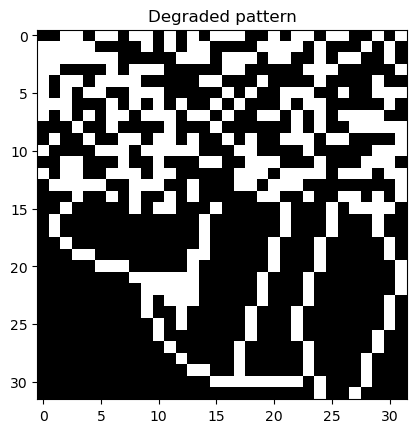

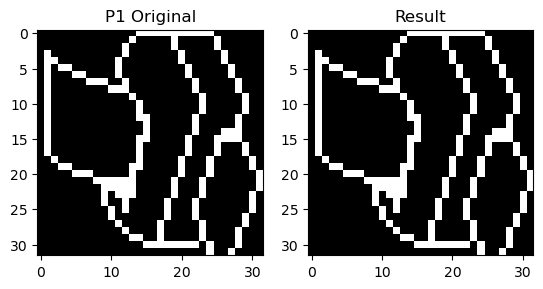

In [13]:
display_pattern(p10)
p10_result = network.predict(p10.reshape((1, 1024)))[0]
# Create a subplot 1x2 and display the original and the result
fig, ax = plt.subplots(1, 2)
ax[0].imshow(p1.reshape(32, 32), interpolation="nearest", cmap="gray")
ax[0].set_title("P1 Original")

ax[1].imshow(p10_result.reshape(32, 32), interpolation="nearest", cmap="gray")
ax[1].set_title("Result")
plt.show()


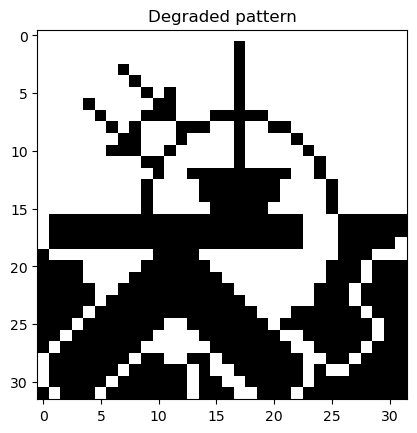

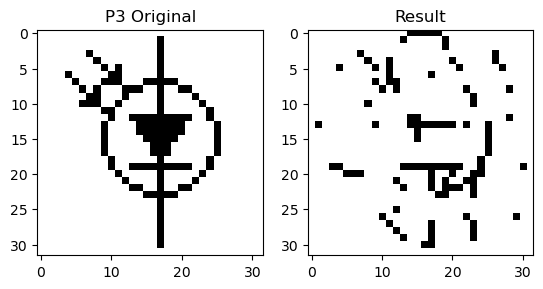

In [22]:
# Tesint for p11
display_pattern(p11)
network = Hopfield.Hopfield(max_iterations=8, prediction_method="sequential")
network.fit(training_data)
p11_result = network.predict(p11.reshape((1, 1024)))[0]

# Create a subplot 1x2 and display the original and the result
fig, ax = plt.subplots(1, 2)
ax[0].imshow(p3.reshape(32, 32), interpolation="nearest", cmap="gray")
ax[0].set_title("P3 Original")

ax[1].imshow(p11_result.reshape(32, 32), interpolation="nearest", cmap="gray")
ax[1].set_title("Result")
plt.show()



- Clearly convergence is practically instantaneous. What happens if we select units randomly? Please calculate their new state and then repeat the process in the spirit of the original sequential Hopfield dynamics. Please demonstrate the image every hundredth iteration or so

KeyboardInterrupt: 

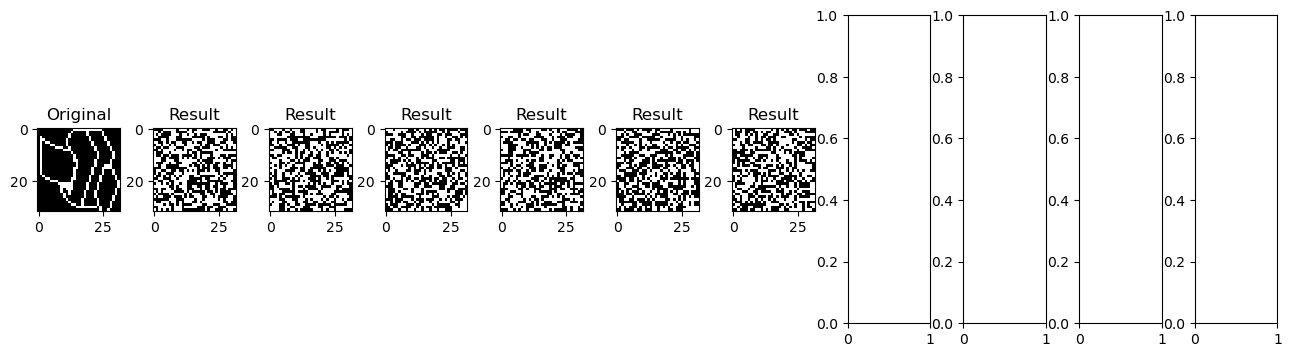

In [15]:
network0 = Hopfield.Hopfield(
    max_iterations=100, random_weights=True, prediction_method="sequential"
)
network1 = Hopfield.Hopfield(
    max_iterations=200, random_weights=True, prediction_method="sequential"
)
network2 = Hopfield.Hopfield(
    max_iterations=300, random_weights=True, prediction_method="sequential"
)
network3 = Hopfield.Hopfield(
    max_iterations=400, random_weights=True, prediction_method="sequential"
)
network4 = Hopfield.Hopfield(
    max_iterations=500, random_weights=True, prediction_method="sequential"
)
network5 = Hopfield.Hopfield(
    max_iterations=600, random_weights=True, prediction_method="sequential"
)
network6 = Hopfield.Hopfield(
    max_iterations=700, random_weights=True, prediction_method="sequential"
)
network7 = Hopfield.Hopfield(
    max_iterations=800, random_weights=True, prediction_method="sequential"
)
network8 = Hopfield.Hopfield(
    max_iterations=900, random_weights=True, prediction_method="sequential"
)
network9 = Hopfield.Hopfield(
    max_iterations=1000, random_weights=True, prediction_method="sequential"
)

networks = [
    network0,
    network1,
    network2,
    network3,
    network4,
    network5,
    network6,
    network7,
    network8,
    network9,
]

# Create a 1 x 11 subplot and display the results. The first one will be the orginal and the rest will be the results
fig, ax = plt.subplots(1, 11, figsize=(16, 4))  # Adjust figsize as needed
fig.subplots_adjust(wspace=0.4)  # Adjust horizontal space between subplots

ax[0].imshow(p1.reshape(32, 32), interpolation="nearest", cmap="gray")
ax[0].set_title("Original")

for i in range(10):
    networks[i].fit(training_data)
    result = networks[i].predict(p1.reshape((1, 1024)))[0]
    ax[i + 1].imshow(result.reshape(32, 32), interpolation="nearest", cmap="gray")
    ax[i + 1].set_title("Result")

plt.show()

## 3.3 Energy
For networks with a symmetric connection matrix, it is possible to define an energy function or *lyapunov Function* a finite valued function of the state that always decreases as the state change. Since it has to have a minimum at least somewhere the dynamics must end up in an attractor. Simple energy function with this property is the following:
$E = \sum_i \sum_j w_{ij}x_ix_j$


- What is the energy at different attractors? 

In [31]:
training_patterns = np.array([p1, p2, p3])

fixed_points = np.array([p1, p2, p3, p4, p5, p6, p7, p8, p9])
testing_patterns = np.array([p10, p11])

network = Hopfield.Hopfield(max_iterations=8, prediction_method="sequential")
network.fit(training_patterns, training_patterns)

for i in range(len(fixed_points)):
    x = fixed_points[i].reshape((1, 1024))

    network.predict(x)
    energy = network.get_energy()

    print("The energy at attractor p{} is {}.".format(i + 1, energy[7][0][0]))

The energy at attractor p1 is -1436.390625.
The energy at attractor p2 is -1362.640625.
The energy at attractor p3 is -1459.25.
The energy at attractor p4 is -1593.01171875.
The energy at attractor p5 is -1593.01171875.
The energy at attractor p6 is -1593.01171875.
The energy at attractor p7 is -1593.01171875.
The energy at attractor p8 is -1593.01171875.
The energy at attractor p9 is -1593.01171875.


- What is the energy at the points of the distorted patterns?


In [32]:
for i in range(len(testing_patterns)):
    x = testing_patterns[i].reshape((1, 1024))

    network.predict(x)
    energy = network.get_energy()

    print("The energy at distorded pattern p{} is {}.".format(i + 10, energy[7][0][0]))



The energy at distorded pattern p10 is -1436.390625.
The energy at distorded pattern p11 is -1459.25.


Follow how the energy changes from iteration to iteration when you use the sequential update rule to approach an attractor.

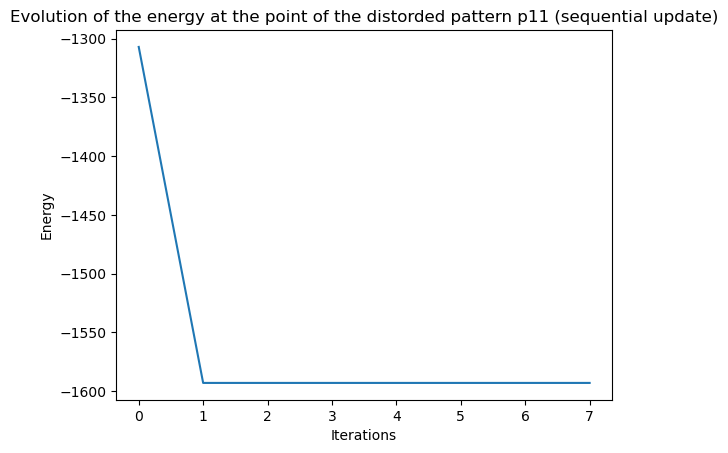

In [33]:
network.predict(p11.reshape((1, 1024)))
energy = network.get_energy()
final_energy = []
for i in range(8):
    final_energy.append(energy[i][0][0])

plt.plot(range(8), final_energy)
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.title(
    "Evolution of the energy at the point of the distorded pattern p11 (sequential update)"
)
plt.show()

- Generate a weight matrix by setting the weights to normally distributed random numbers and try iterating an arbitrary starting state. What happens?


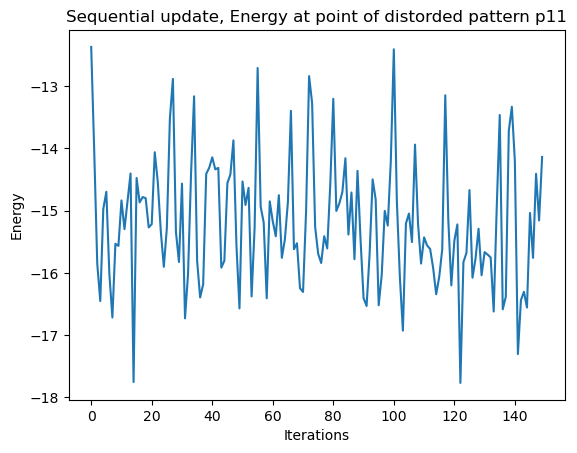

In [35]:
network = Hopfield.Hopfield(
    max_iterations=150, prediction_method="sequential", random_weights=True
)
network.fit(training_patterns, training_patterns)

network.predict(p11.reshape((1, 1024)))
energy = network.get_energy()

final_energy = []  # Initialize an empty list to store energy values

for i in range(150):
    final_energy.append(energy[i][0][0])  # Append energy value for each iteration

plt.plot(range(150), final_energy)
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.title(
    "Sequential update, Energy at point of distorded pattern p11"
)
plt.show()

- Make the weight matrix symmetric (e.g. by setting w=0.5*(w+w')). What happens now? Why?


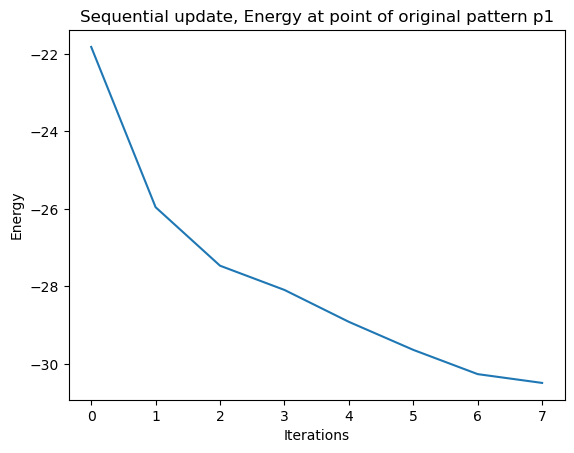

In [36]:
network = Hopfield.Hopfield(
    max_iterations=8,
    prediction_method="sequential",
    random_weights=True,
    symmetric_weights=True,
)
network.fit(training_patterns, training_patterns)
network.predict(p1.reshape((1, 1024)))
energy = network.get_energy()
final_energy = []
for i in range(8):
    final_energy.append(energy[i][0][0])

plt.plot(range(8), final_energy)
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.title(
    "Sequential update, Energy at point of original pattern p1"
)
plt.show()

## 3.4 Distortion resistance
- How much noise can be removed?
- Is there any differnece between the three attractors with regard to noise tolerance?
**Answer** 50% noise can be removed. No difference in regards to noise tolerance. Does not always converge to right attracters when noise is added, seems to go to the wrong one sometimes.


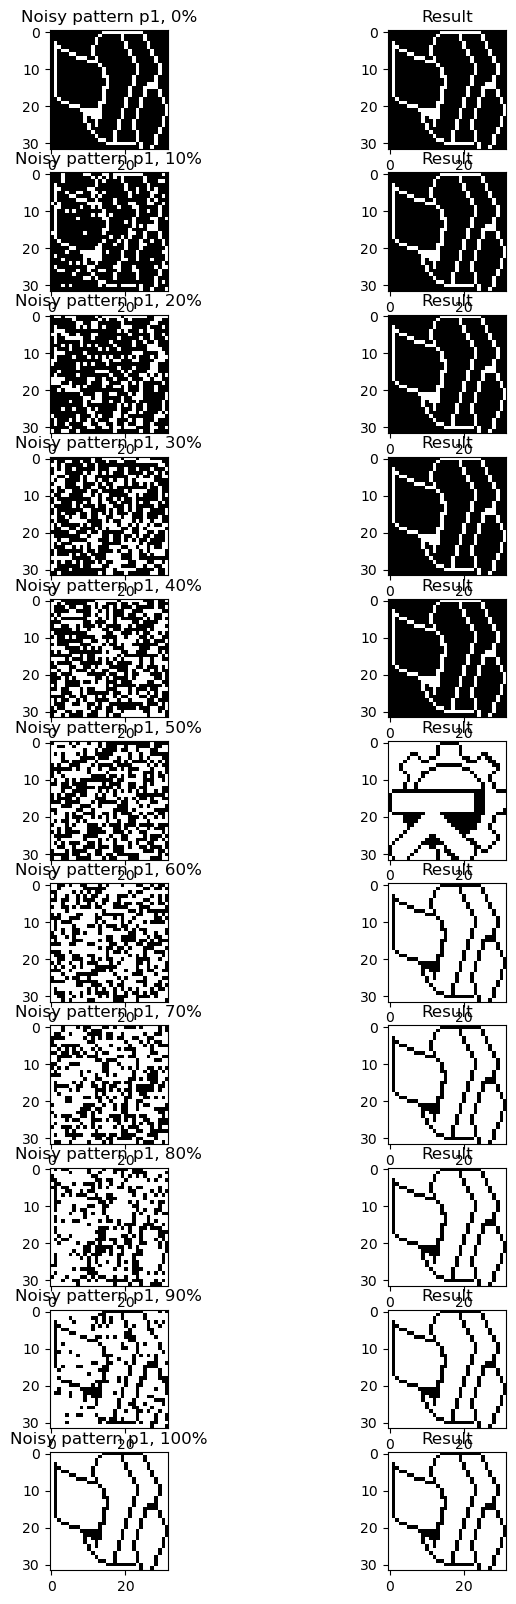

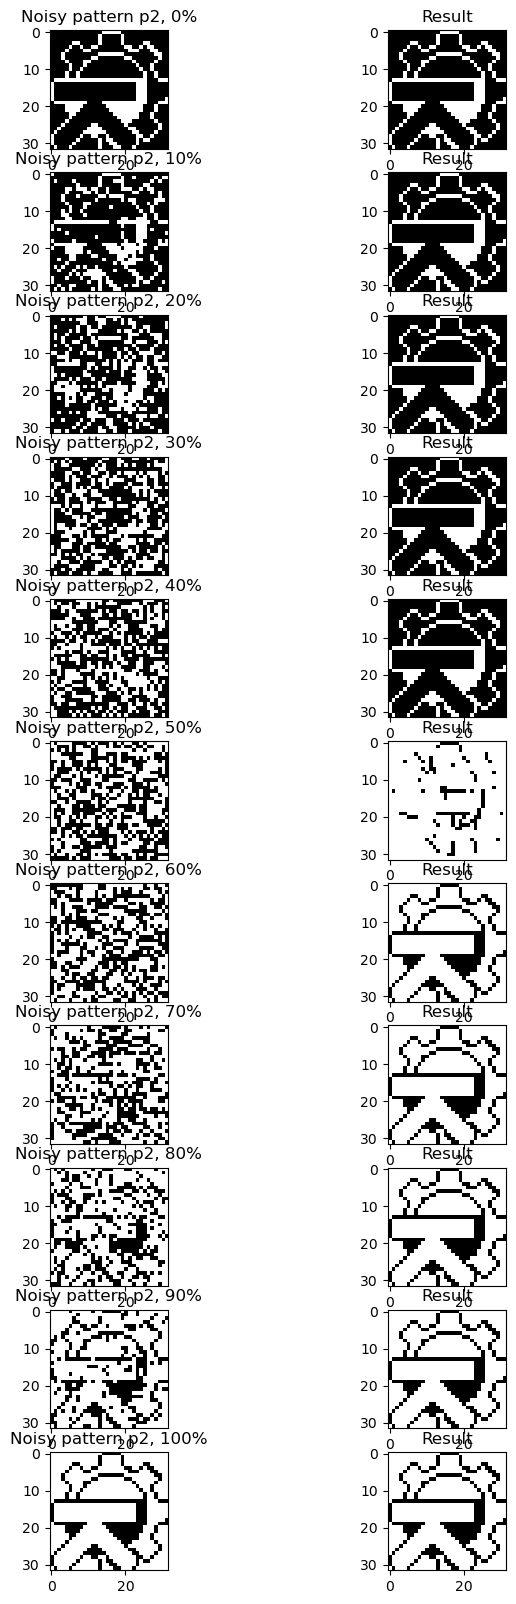

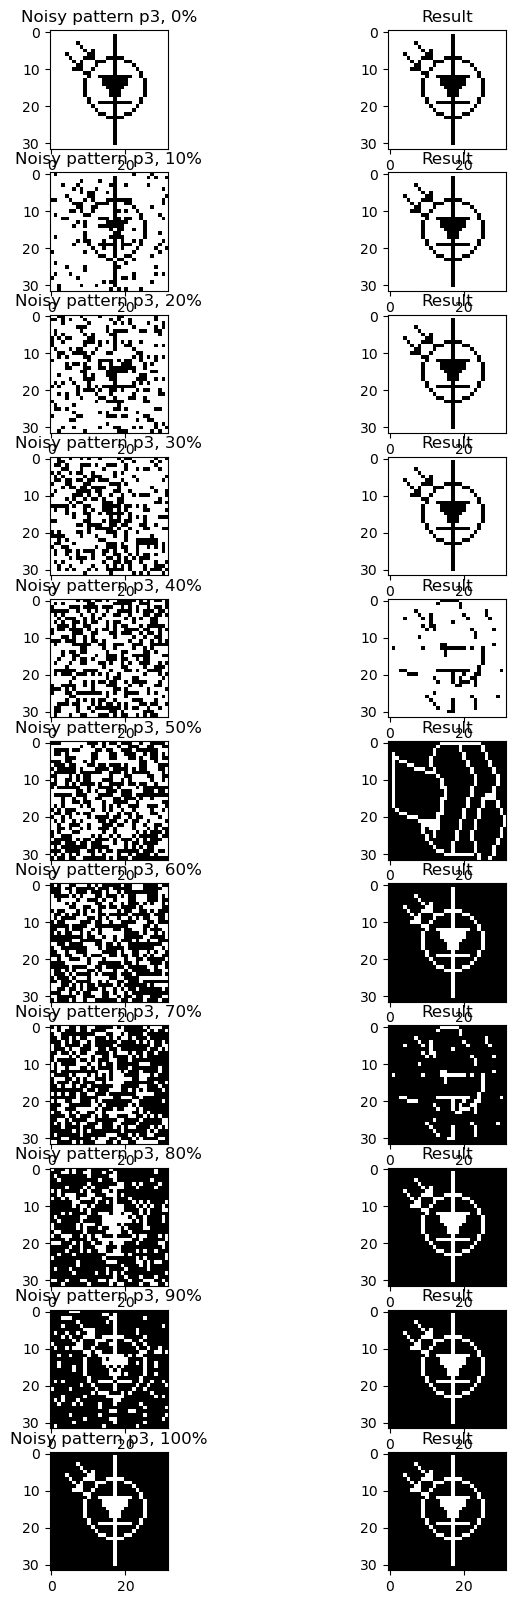

In [37]:
training_patterns = np.array([p1,p2,p3])
network = Hopfield.Hopfield(max_iterations=8)
network.fit(training_patterns, training_patterns)

def noisy_pattern(pattern,percentage):
    pattern = pattern.copy()
    idx = np.random.choice(
        len(pattern), int(np.ceil(len(pattern) / 100 * percentage)), replace=False
    )
    pattern[idx] = -pattern[idx]
    return pattern

percentages = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Create a 2 x 10 subplot and display the results. The first column = noisy pattern, the second column = result
fig, ax = plt.subplots(11, 2, figsize=(8, 20))  # Adjust figsize as needed

for p in percentages:
    noisy_p1 = noisy_pattern(p1, p)
    p1_result = network.predict(noisy_p1)
    ax[int(p / 10)][0].imshow(noisy_p1.reshape(32, 32), interpolation="nearest", cmap="gray")
    ax[int(p / 10)][0].set_title("Noisy pattern p1, {}%".format(p))
    ax[int(p / 10)][1].imshow(p1_result.reshape(32, 32), interpolation="nearest", cmap="gray")
    ax[int(p / 10)][1].set_title("Result")

fig2, ax2 = plt.subplots(11, 2, figsize=(8, 20))  # Adjust figsize as needed
for p in percentages:
    noisy_p2 = noisy_pattern(p2, p)
    p2_result = network.predict(noisy_p2)
    ax2[int(p / 10)][0].imshow(noisy_p2.reshape(32, 32), interpolation="nearest", cmap="gray")
    ax2[int(p / 10)][0].set_title("Noisy pattern p2, {}%".format(p))
    ax2[int(p / 10)][1].imshow(p2_result.reshape(32, 32), interpolation="nearest", cmap="gray")
    ax2[int(p / 10)][1].set_title("Result")


fig3, ax3 = plt.subplots(11, 2, figsize=(8, 20))  # Adjust figsize as needed


for p in percentages:
    noisy_p3 = noisy_pattern(p3, p)
    p3_result = network.predict(noisy_p3)
    ax3[int(p / 10)][0].imshow(noisy_p3.reshape(32, 32), interpolation="nearest", cmap="gray")
    ax3[int(p / 10)][0].set_title("Noisy pattern p3, {}%".format(p))
    ax3[int(p / 10)][1].imshow(p3_result.reshape(32, 32), interpolation="nearest", cmap="gray")
    ax3[int(p / 10)][1].set_title("Result")

plt.show()

## 3.5 Capacity
Now add more and more memories to the network to see where the limit is. Start by adding p4 into the weight matrix and check if moderately distorted patterns can still be recognized. Then continue by adding others such as p5,p6 and p7 in some order and checking the performance after each addition.
- How many patterns could safely be stored? Was the drop in performance gradual or abrupt?
- Try to repeat this with learning a few random patterns instead of picturesa nad see if you can store more.
- It has been shown that the capacity of a Hopfield network is around 0.138N. How do you explain the difference between random patterns and the pictures 

In [39]:
random_patterns = []
for i in tqdm(range(300)):
    random_patterns.append(np.random.choice([-1, 1], 100, p=[0.5, 0.5], replace=True))

stable_patterns = []
for i in tqdm(range(1, 301)):
    training_patterns = random_patterns[:i]

    network = Hopfield.Hopfield(max_iterations=10)
    network.fit(training_patterns, training_patterns)

    n_stable_patterns = 0
    for j in range(i):
        pattern = training_patterns[j]
        result = network.predict(pattern)
        if np.array_equal(pattern, result):
            n_stable_patterns += 1

    stable_patterns.append(n_stable_patterns)

100%|██████████| 300/300 [02:14<00:00,  2.23it/s]


Text(0, 0.5, 'Number of Memorized Patterns')

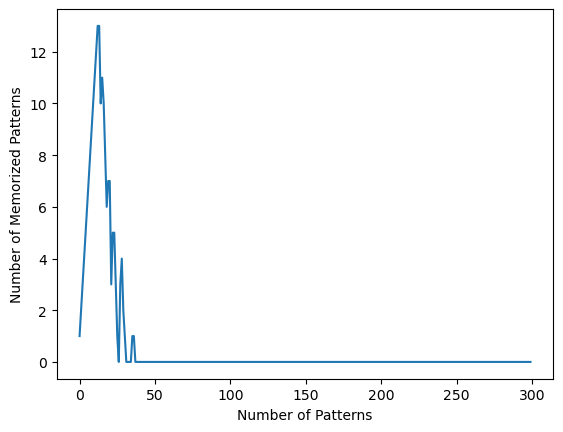

In [40]:
plt.plot(stable_patterns)
plt.xlabel("Number of Patterns")
plt.ylabel("Number of Memorized Patterns")